In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# Sample Data:
data = {
    'Hour Studied':[2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5,
1.9, 6.1, 7.4],
    'Scores' :[21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24, 67, 69]
}

df = pd.DataFrame(data)

In [5]:
df.head()

,Hour Studied,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.describe(include='all')

,Hour Studied,Scores
count,20.000000,20.000000
mean,4.965000,50.300000
std,2.663451,25.941432
min,1.100000,17.000000
25%,2.650000,26.500000
50%,4.800000,44.500000
75%,7.475000,70.500000
max,9.200000,95.000000


In [9]:
df.isnull().sum()

Hour Studied    0
Scores          0
dtype: int64

In [10]:
# Features
# Target

X = df[['Hour Studied']]
y = df['Scores']

# Split the Data set into Train and Test:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=50)

print(X.shape)
print(X.head())

(20, 1)
   Hour Studied
0           2.5
1           5.1
2           3.2
3           8.5
4           3.5


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled
X_test_scaled

array([[ 1.73266781],
       [ 1.49194985],
       [-0.7547511 ],
       [ 0.60931733]])

In [16]:
model = LinearRegression()

model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)

mse = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Square Error : {mse}")
print(f"R2 Score : {r2}")

Mean Square Error : 5.46155224556264
R2 Score : 0.941499333114391


In [17]:
# Coefficients of interpretation:

print(f"Intercept : {model.intercept_}")
print(f"Coeficients : {model.coef_}")

Intercept : 46.125
Coeficients : [22.64347331]


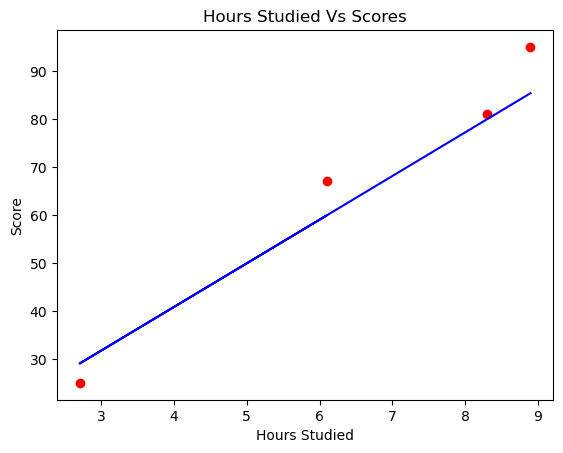

In [18]:
import matplotlib.pyplot as plt

# Plotting the Results:

plt.scatter(X_test,y_test, color='red')
plt.plot(X_test,y_pred, color='blue')
plt.title("Hours Studied Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()